In [3]:
import piplite
await piplite.install('seaborn')
import piplite
await piplite.install('yellowbrick')
# Importing the Libraries 
import numpy as np 
import pandas as pd 
import datetime 
import matplotlib 
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
from matplotlib import colors 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt, numpy as np 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import AgglomerativeClustering 
from matplotlib.colors import ListedColormap 
from sklearn import metrics 
import warnings 
import sys 
if not sys.warnoptions: 
 warnings.simplefilter("ignore")
np.random.seed(42) 
# Loading the dataset 
dataset = pd.read_csv("college.csv",on_bad_lines='skip') 
dataset.head()

,Age,Gender,Your Family income,Which region do you belong to?\n\n,Course,Branch,faculty score you prefer ?,Rate your college,Your current status among the following?,Does your college make improvements as per the trends?,...,What do you prefer about the policies of any college?,Should Distance Learning programs be available in a college?,prefer the most for extra - curricular activities related to your future support?,What did you prefer in college Infrastructure?,Which Language you prefer?,Average package you prefer for your college?,Does Travel Time plays key role in your choice making?,Social-class status of college that you would prefer?,Do you prefer colleges that provide financial-aid for students?,Any suggested changes in your college?
0,20,Female,less than 2 lakh,Ghaziabad,B.Tech,CSIT,10,3,Day Scholar,Yes,...,lenient,No,Internships,Clubs;Cleanliness;Labs,Hindi,4 lakh -4.5 lakh,Yes,NaN,Yes,Extracurricular activities
1,20,Female,2 lakh -5 lakh,Gorakhpur,B.Tech,CSIT,8,3,PG,Yes,...,lenient,Yes,Internships,Clubs;Sports;Library;Cleanliness;Hostel;Labs,Hindi;English,4 lakh -4.5 lakh,No,High,No,Extracurricular activities
2,22,Female,less than 2 lakh,Ghaziabad,Other,Other,8,5,PG,Yes,...,neutral,Yes,Internships,Library,English,2.5 lakh - 3 lakh,Yes,Medium,Yes,E- Learning
3,22,Female,2 lakh -5 lakh,Ghaziabad,Other,Other,10,4,Day Scholar,Yes,...,neutral,No,Internships,Clubs;Cleanliness,Hindi;English,3.5 lakh -4 lakh,Yes,NaN,Yes,More Research work
4,21,Female,less than 2 lakh,Ghaziabad,B.Tech,CSIT,8,4,Day Scholar,Yes,...,lenient,No,Internships,Clubs;Sports;Library;Cleanliness,Hindi;English,3 lakh - 3.5 lakh,Yes,Medium,Yes,Extracurricular activities


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


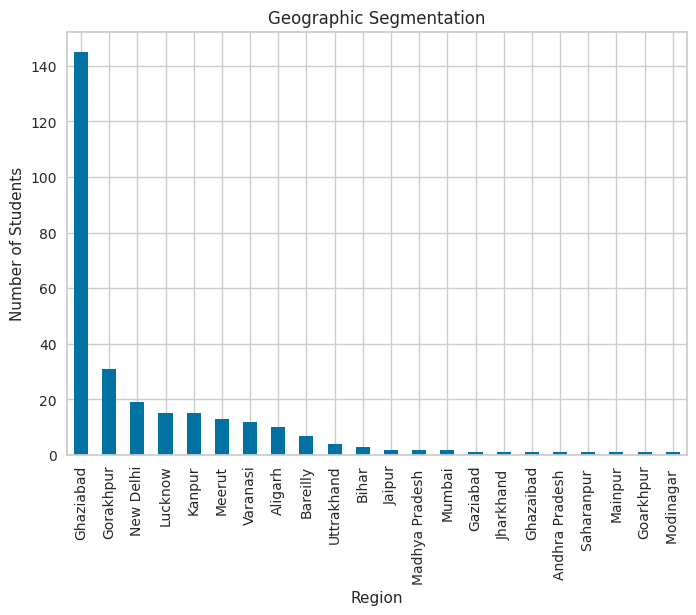

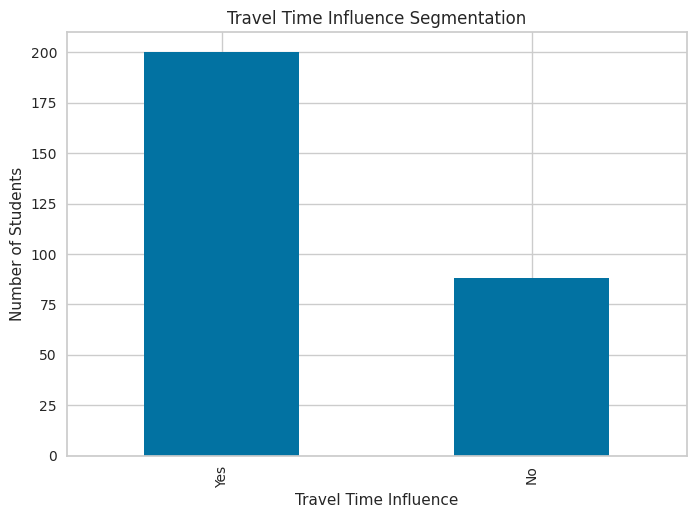

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'student_data' with the relevant columns
# 'Travel Time' and 'Region', and you've already loaded your data into it.

# Geographic Segmentation
region_counts = dataset['Which region do you belong to?\n\n'].value_counts()
region_counts.plot(kind='bar', title='Geographic Segmentation')
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.show()

# Travel Time Influence Segmentation
travel_time_counts = dataset['Does Travel Time plays key role in your choice making?'].value_counts()
travel_time_counts.plot(kind='bar', title='Travel Time Influence Segmentation')
plt.xlabel('Travel Time Influence')
plt.ylabel('Number of Students')
plt.show()


In [5]:
# We need to remove the NA values from our dataset, so we will use .dropna() 
datasetdataset = dataset.dropna() 
no=len(dataset) 
print("After eliminating the rows with missing values, there are ultimately {no} number of datapoints in the dataset ")

After eliminating the rows with missing values, there are ultimately {no} number of datapoints in the dataset 


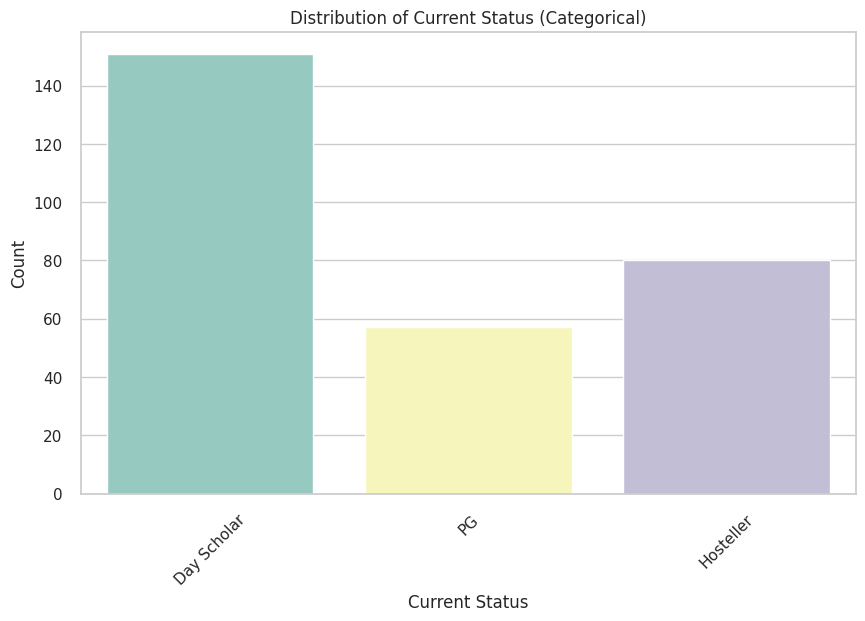

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'student_data' with the 'Current Status' column.

# First, convert the 'Current Status' column to numeric form using a label encoding:
current_status_numeric = pd.Categorical(dataset['Your current status among the following?'])
dataset['Current Status Numeric'] = current_status_numeric.codes

# Now, plot the graph:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Your current status among the following?', data=dataset, palette="Set3")

# Customize the plot
plt.title('Distribution of Current Status (Categorical)')
plt.xlabel('Current Status')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

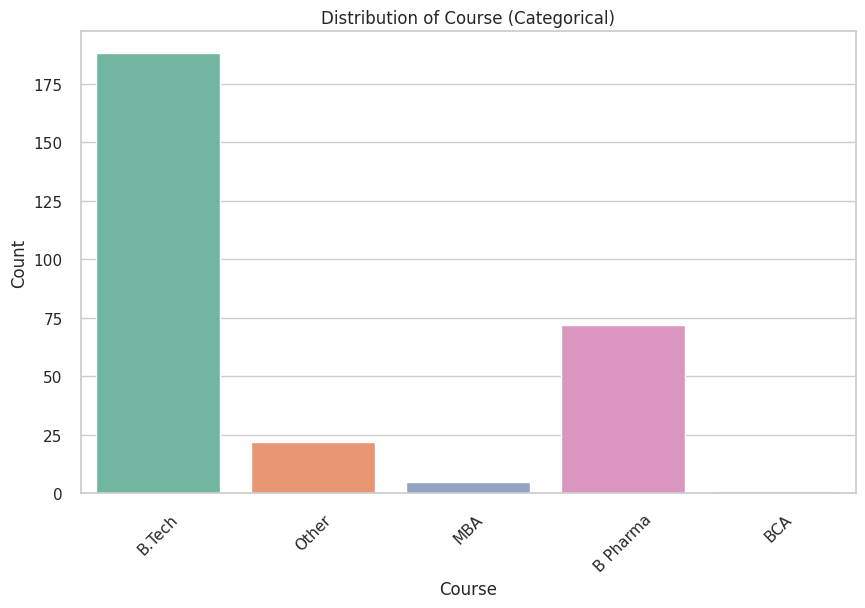

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'student_data' with the 'Current Status' column.

# First, convert the 'Current Status' column to numeric form using a label encoding:
current_status_numeric = pd.Categorical(dataset['Course'])
dataset['Course Numeric'] = current_status_numeric.codes

# Now, plot the graph:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Course', data=dataset, palette="Set2")

# Customize the plot
plt.title('Distribution of Course (Categorical)')
plt.xlabel('Course')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

In [8]:
# Obtain a list of the category variables 
s = (dataset.dtypes == 'object') 
object_columns = list(s[s].index) 
 
print("the dataset's categorical variables are: \n", object_columns,"\
n")
# The object dtypes are label encoded. 
LE=LabelEncoder() 
for i in object_columns: 
 dataset[i]=dataset[[i]].apply(LE.fit_transform) 
 
print("Now, all attributes are numerical.")

the dataset's categorical variables are: 
 ['Gender', 'Your Family income', 'Which region do you belong to?\n\n', 'Course', 'Branch', 'Your current status among the following?', 'Does your college make improvements as per the trends?', 'Does your college library provide adequate resources?', 'Are you satisfied with the canteen facility of your college?', 'Does college provides you with adequate sports and extracurricular activities facilities', 'How you came to know about the college?', 'Have you investigated this detail while choosing your college?', 'Have you investigated this detail ?', 'Have you considered good Alumni network of any college while taking admission in it?', 'Have you considered the policies of any college while choosing it ? ', 'What did you preferred?', 'What do you prefer about the policies of any college?', 'Should Distance Learning programs be available in a college?', 'prefer the most for extra - curricular activities related to your future support?', 'What did 

In [9]:
dataset.head(289)


,Age,Gender,Your Family income,Which region do you belong to?\n\n,Course,Branch,faculty score you prefer ?,Rate your college,Your current status among the following?,Does your college make improvements as per the trends?,...,prefer the most for extra - curricular activities related to your future support?,What did you prefer in college Infrastructure?,Which Language you prefer?,Average package you prefer for your college?,Does Travel Time plays key role in your choice making?,Social-class status of college that you would prefer?,Do you prefer colleges that provide financial-aid for students?,Any suggested changes in your college?,Current Status Numeric,Course Numeric
0,20,0,2,6,1,3,10,3,0,1,...,3,5,2,5,1,3,1,7,0,1
1,20,0,0,8,1,3,8,3,2,1,...,3,29,4,5,0,0,0,7,2,1
2,22,0,2,6,4,8,8,5,2,1,...,3,38,0,1,1,2,1,4,2,4
3,22,0,0,6,4,8,10,4,0,1,...,3,3,4,4,1,3,1,18,0,4
4,21,0,2,6,1,3,8,4,0,1,...,3,28,4,3,1,2,1,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,19,0,2,6,0,8,8,4,0,1,...,3,38,2,0,1,2,1,18,0,0
284,19,0,2,6,0,8,10,5,0,1,...,3,0,0,6,1,0,1,20,0,0
285,23,0,0,0,4,8,8,4,0,1,...,3,28,4,6,1,2,1,18,0,4
286,20,1,2,6,0,8,6,4,0,1,...,3,50,0,2,1,2,1,7,0,0


In [10]:
# making a duplicate of the data 
copy_dataset = dataset.copy() 
# Removing the features on deals accepted and promotions to create a subset of the dataframe 
columns_to_delete = ['Any suggested changes in your college?'] 
copy_datasetcopy_dataset = copy_dataset.drop(columns_to_delete, axis=1) 
# Scaling 
standard_scaler = StandardScaler() 
standard_scaler.fit_transform(copy_dataset) 
scaled_dataset = pd.DataFrame(standard_scaler.transform(copy_dataset),columns= copy_dataset.columns ) 
print(" Now, every feature is scaled ") 

 Now, every feature is scaled 


In [11]:
# Using scaled data to reduce the dimensionality 
print("Dataframe to be applied in further modelling:") 
scaled_dataset.head(289) 

Dataframe to be applied in further modelling:


,Age,Gender,Your Family income,Which region do you belong to?\n\n,Course,Branch,faculty score you prefer ?,Rate your college,Your current status among the following?,Does your college make improvements as per the trends?,...,prefer the most for extra - curricular activities related to your future support?,What did you prefer in college Infrastructure?,Which Language you prefer?,Average package you prefer for your college?,Does Travel Time plays key role in your choice making?,Social-class status of college that you would prefer?,Do you prefer colleges that provide financial-aid for students?,Any suggested changes in your college?,Current Status Numeric,Course Numeric
0,-0.149892,-1.208941,0.692549,-0.533862,-0.017274,-0.657455,1.672347,-0.691465,-0.858474,0.52915,...,-0.268659,-1.468621,-0.269779,-0.182746,0.663325,1.663207,0.371941,-0.847126,-0.858474,-0.017274
1,-0.149892,-1.208941,-1.374332,-0.140130,-0.017274,-0.657455,0.234628,-0.691465,1.690398,0.52915,...,-0.268659,0.076919,0.824535,-0.182746,-1.507557,-1.413904,-2.688600,-0.847126,1.690398,-0.017274
2,1.543004,-1.208941,0.692549,-0.533862,2.967667,1.152746,0.234628,1.361545,1.690398,0.52915,...,-0.268659,0.656497,-1.364092,-1.634628,0.663325,0.637503,0.371941,-1.244475,1.690398,2.967667
3,1.543004,-1.208941,-1.374332,-0.533862,2.967667,1.152746,1.672347,0.335040,-0.858474,0.52915,...,-0.268659,-1.597416,0.824535,-0.545716,0.663325,1.663207,0.371941,0.609821,-0.858474,2.967667
4,0.696556,-1.208941,0.692549,-0.533862,-0.017274,-0.657455,0.234628,0.335040,-0.858474,0.52915,...,-0.268659,0.012522,0.824535,-0.908687,0.663325,0.637503,0.371941,-0.847126,-0.858474,-0.017274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-0.996339,-1.208941,0.692549,-0.533862,-1.012254,1.152746,0.234628,0.335040,-0.858474,0.52915,...,-0.268659,0.656497,-0.269779,-1.997599,0.663325,0.637503,0.371941,0.609821,-0.858474,-1.012254
284,-0.996339,-1.208941,0.692549,-0.533862,-1.012254,1.152746,1.672347,1.361545,-0.858474,0.52915,...,-0.268659,-1.790609,-1.364092,0.180225,0.663325,-1.413904,0.371941,0.874720,-0.858474,-1.012254
285,2.389451,-1.208941,-1.374332,-1.715057,2.967667,1.152746,0.234628,0.335040,-0.858474,0.52915,...,-0.268659,0.012522,0.824535,0.180225,0.663325,0.637503,0.371941,0.609821,-0.858474,2.967667
286,-0.149892,0.827170,0.692549,-0.533862,-1.012254,1.152746,-1.203092,0.335040,-0.858474,0.52915,...,-0.268659,1.429267,-1.364092,-1.271658,0.663325,0.637503,0.371941,-0.847126,-0.858474,-1.012254


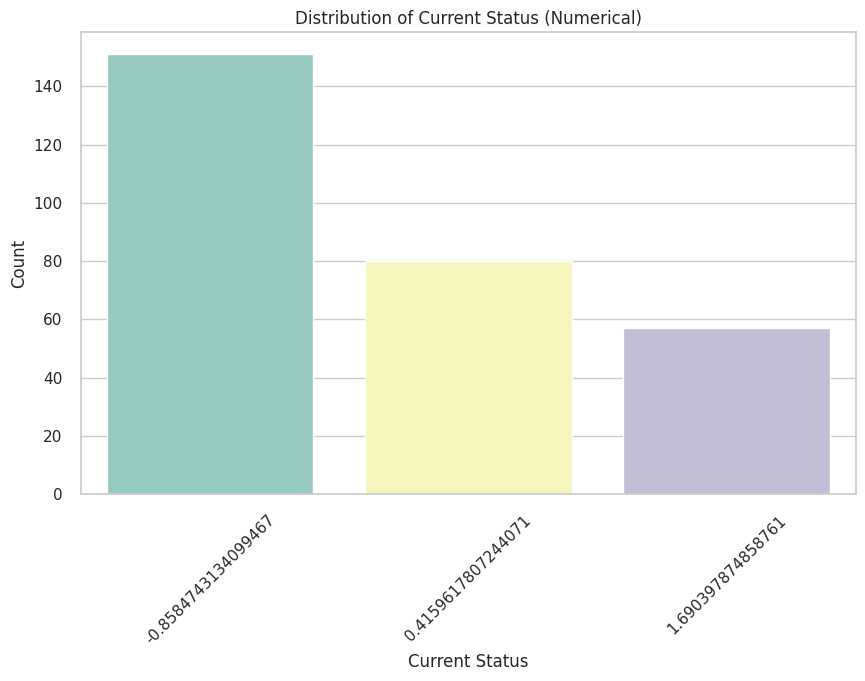

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'student_data' with the 'Current Status' column.

# First, convert the 'Current Status' column to numeric form using a label encoding:
current_status_numeric = pd.Categorical(scaled_dataset['Your current status among the following?'])
scaled_dataset['Current Status Numeric'] = current_status_numeric.codes

# Now, plot the graph:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Your current status among the following?', data=scaled_dataset, palette="Set3")

# Customize the plot
plt.title('Distribution of Current Status (Numerical)')
plt.xlabel('Current Status')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

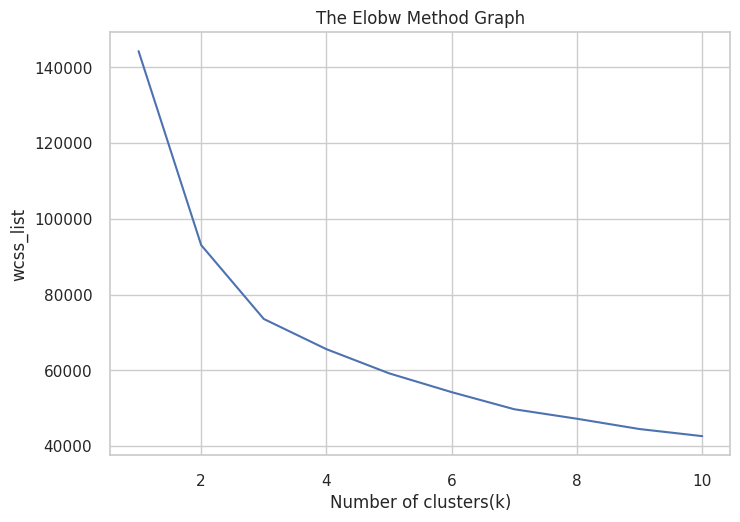

In [13]:
x = dataset.iloc[:,].values 
#finding optimal number of clusters using the elbow method 
from sklearn.cluster import KMeans 
wcss_list= [] #Initializing the list for the values of WCSS 
 
#Using for loop for iterations from 1 to 10. 
for i in range(1, 11): 
 kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42) 
 kmeans.fit(x) 
 wcss_list.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss_list) 
plt.title('The Elobw Method Graph') 
plt.xlabel('Number of clusters(k)') 
plt.ylabel('wcss_list') 
plt.show()

In [14]:
algorithm = (KMeans(n_clusters = 8 ,init='k-means++', n_init =
10 ,max_iter=300, 
 tol=0.0001, random_state= 111 , 
algorithm='elkan') )
algorithm.fit(x)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
y_kmeans = algorithm.fit_predict(x)
scaled_dataset['cluster'] = pd.DataFrame(y_kmeans)
scaled_dataset.head(20)


,Age,Gender,Your Family income,Which region do you belong to?\n\n,Course,Branch,faculty score you prefer ?,Rate your college,Your current status among the following?,Does your college make improvements as per the trends?,...,What did you prefer in college Infrastructure?,Which Language you prefer?,Average package you prefer for your college?,Does Travel Time plays key role in your choice making?,Social-class status of college that you would prefer?,Do you prefer colleges that provide financial-aid for students?,Any suggested changes in your college?,Current Status Numeric,Course Numeric,cluster
0,-0.149892,-1.208941,0.692549,-0.533862,-0.017274,-0.657455,1.672347,-0.691465,-0.858474,0.529150,...,-1.468621,-0.269779,-0.182746,0.663325,1.663207,0.371941,-0.847126,0,-0.017274,0
1,-0.149892,-1.208941,-1.374332,-0.140130,-0.017274,-0.657455,0.234628,-0.691465,1.690398,0.529150,...,0.076919,0.824535,-0.182746,-1.507557,-1.413904,-2.688600,-0.847126,2,-0.017274,3
2,1.543004,-1.208941,0.692549,-0.533862,2.967667,1.152746,0.234628,1.361545,1.690398,0.529150,...,0.656497,-1.364092,-1.634628,0.663325,0.637503,0.371941,-1.244475,2,2.967667,1
3,1.543004,-1.208941,-1.374332,-0.533862,2.967667,1.152746,1.672347,0.335040,-0.858474,0.529150,...,-1.597416,0.824535,-0.545716,0.663325,1.663207,0.371941,0.609821,0,2.967667,6
4,0.696556,-1.208941,0.692549,-0.533862,-0.017274,-0.657455,0.234628,0.335040,-0.858474,0.529150,...,0.012522,0.824535,-0.908687,0.663325,0.637503,0.371941,-0.847126,0,-0.017274,4
5,-0.996339,-1.208941,-1.374332,-0.140130,-0.017274,-0.657455,0.234628,-0.691465,1.690398,0.529150,...,0.205714,0.824535,1.269137,-1.507557,-1.413904,0.371941,-0.847126,2,-0.017274,4
6,0.696556,-1.208941,-1.374332,-0.533862,-0.017274,-0.657455,0.234628,1.361545,-0.858474,0.529150,...,1.622460,-1.364092,1.269137,0.663325,0.637503,0.371941,-0.847126,0,-0.017274,7
7,0.696556,-1.208941,-1.374332,-0.533862,-0.017274,-0.657455,0.234628,-2.744475,-0.858474,0.529150,...,0.978485,-1.364092,1.269137,0.663325,0.637503,0.371941,0.609821,0,-0.017274,7
8,-1.842787,-1.208941,0.692549,-0.533862,2.967667,1.152746,-1.203092,-0.691465,-0.858474,0.529150,...,0.656497,-1.364092,-1.634628,-1.507557,0.637503,0.371941,-0.847126,0,2.967667,4
9,-0.996339,-1.208941,-1.374332,-0.533862,2.967667,1.152746,-1.203092,-0.691465,-0.858474,-1.889822,...,-1.790609,-0.269779,-1.634628,-1.507557,0.637503,0.371941,-0.847126,0,2.967667,6


In [15]:
scaled_dataset.fillna(-999, inplace=True)
#Initiating PCA to reduce dimensions, aka features, to 3 
pca = PCA(n_components=3) 
pca.fit(scaled_dataset) 
PCA_dataset = pd.DataFrame(pca.transform(scaled_dataset), columns=(["col1","col2", "col3"])) 
PCA_dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
col1,288.0,1.233581e-16,2.156529,-3.934463,-1.387889,-0.267759,1.510452,4.259108
col2,288.0,-6.167906e-18,1.832976,-3.292895,-1.327139,-0.365460,0.954190,5.839485
col3,288.0,7.401487e-17,1.593719,-3.514621,-1.150434,0.012676,0.932617,4.032514


In [16]:
# To find the accuracy of the data

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming you have ground truth labels in a 'true_labels' column of your dataset
true_labels = scaled_dataset['Age']  # Replace 'true_labels' with the actual column name

# Assuming you have obtained cluster assignments using K-Means
kmeans_labels = scaled_dataset['cluster']  # Replace 'cluster' with the actual column name

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, kmeans_labels)

# Calculate Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(true_labels, kmeans_labels)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')


Adjusted Rand Index (ARI): 0.002856855911638857
Normalized Mutual Information (NMI): 0.03502820830301978


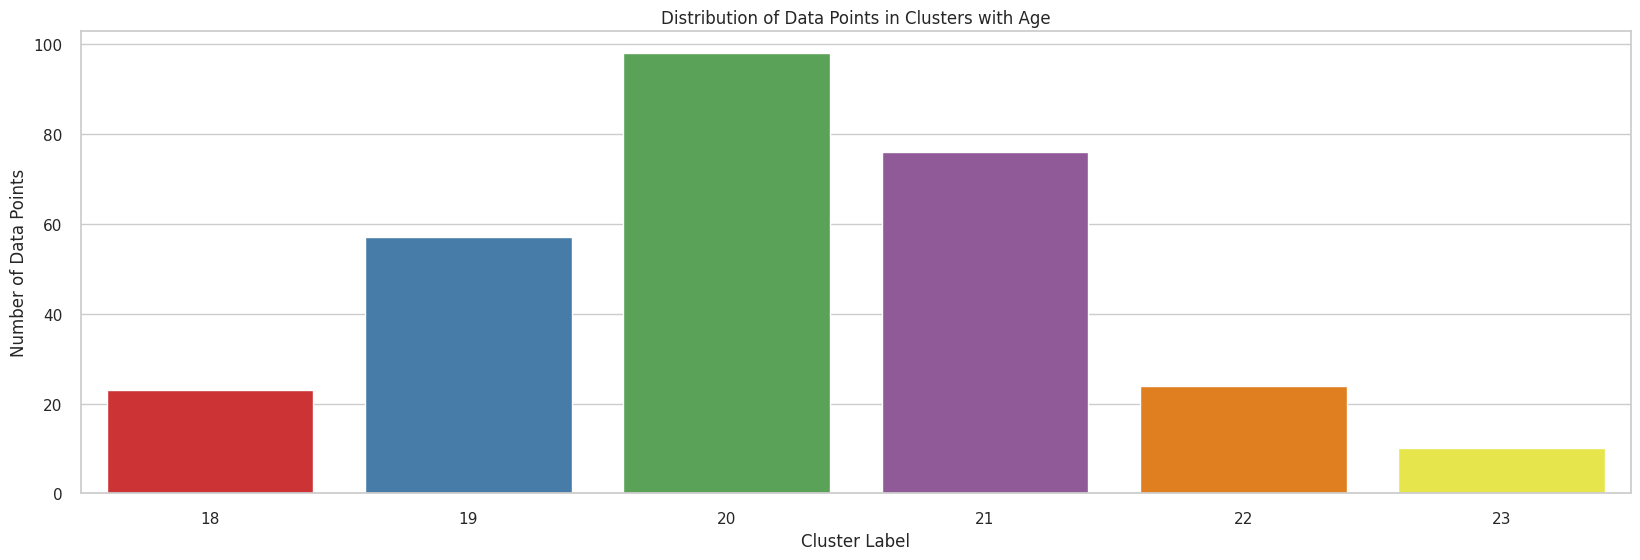

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 contains 'Age' and 'label' columns

# Group the data by cluster and calculate the count of data points in each cluster
cluster_counts = dataset.groupby('Age')['Age'].count()

# Create a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts, palette="Set1")

# Set labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points in Clusters with Age')

# Show the plot
plt.show()

In [19]:
#Since your dataset seems to be more about preferences and characteristics of students rather than a clear
#classification problem, accuracy may not be the most appropriate metric.

In [21]:
#To explore how students gather information and make decisions when choosing a college and visualize the relationships between given factors, you can create various types of graphs. In this case, I'll use bar charts to show the distribution of responses for certain factors.

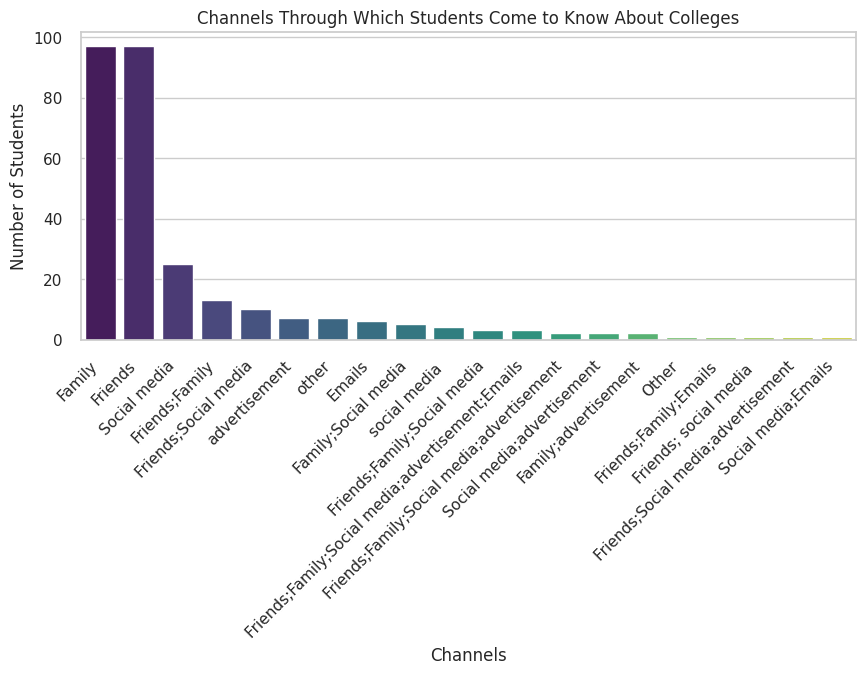

In [44]:
#1. Channels Through Which Students Come to Know About Colleges:

import piplite
await piplite.install('seaborn')

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('college.csv')
# Extracting relevant columns
channels = df['How you came to know about the college?'].value_counts()

# Plotting bar chart
plt.figure(figsize=(10,4))
sns.barplot(x=channels.index, y=channels.values, palette='viridis')
plt.title('Channels Through Which Students Come to Know About Colleges')
plt.xlabel('Channels')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()


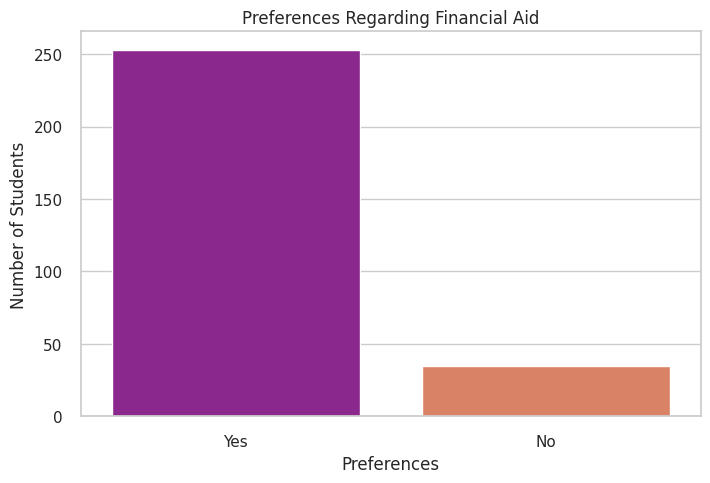

In [23]:
#2. Preferences Regarding Financial Aid:

# Extracting relevant columns
financial_aid = df['Do you prefer colleges that provide financial-aid for students?'].value_counts()

# Plotting bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=financial_aid.index, y=financial_aid.values, palette='plasma')
plt.title('Preferences Regarding Financial Aid')
plt.xlabel('Preferences')
plt.ylabel('Number of Students')
plt.show()


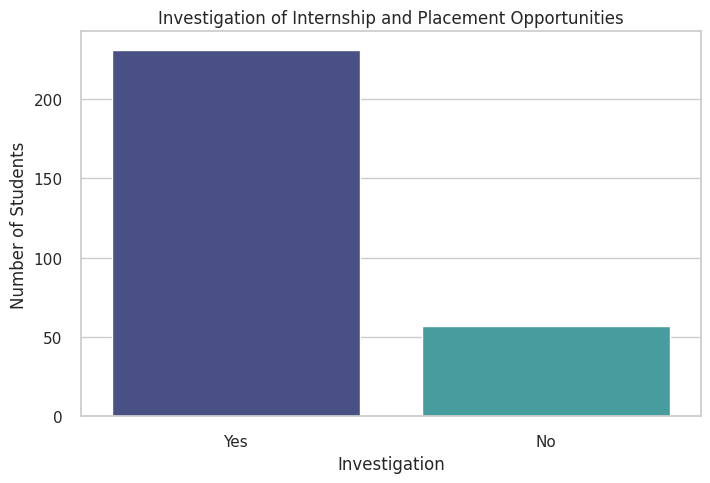

In [24]:
#3. Investigation of Internship and Placement Opportunities:

# Extracting relevant columns
investigate_internship_placement = df['Have you investigated this detail while choosing your college?'].value_counts()

# Plotting bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=investigate_internship_placement.index, y=investigate_internship_placement.values, palette='mako')
plt.title('Investigation of Internship and Placement Opportunities')
plt.xlabel('Investigation')
plt.ylabel('Number of Students')
plt.show()


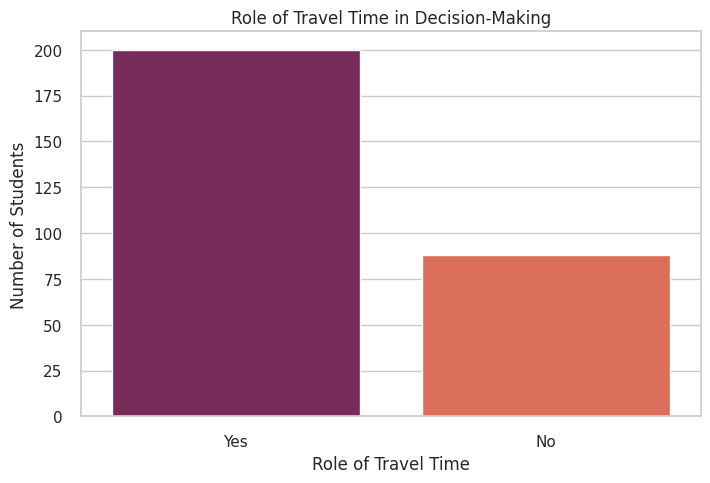

In [25]:
#4. Role of Travel Time in Decision-Making:

# Extracting relevant columns
travel_time_role = df['Does Travel Time plays key role in your choice making?'].value_counts()

# Plotting bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=travel_time_role.index, y=travel_time_role.values, palette='rocket')
plt.title('Role of Travel Time in Decision-Making')
plt.xlabel('Role of Travel Time')
plt.ylabel('Number of Students')
plt.show()


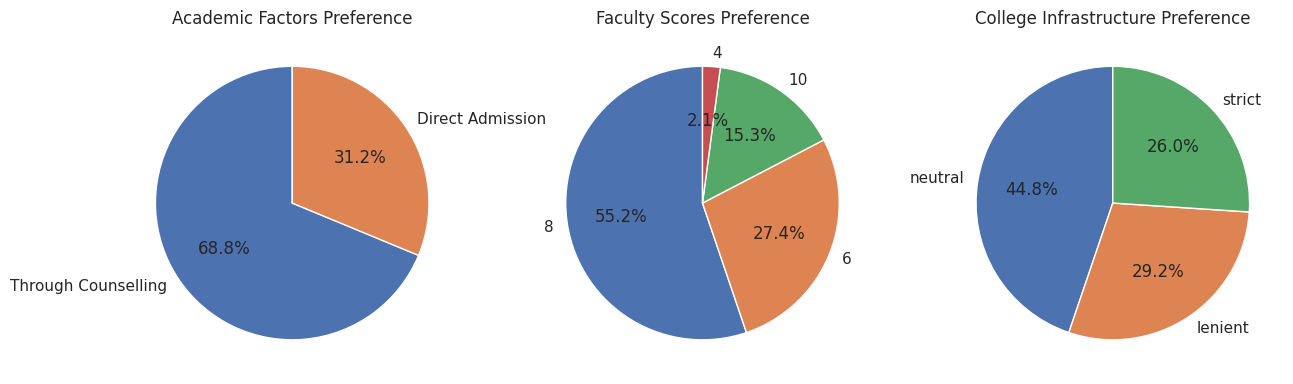

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'college_preferences.csv'
data = pd.read_csv('college.csv')

# Extract relevant columns
academic_factors = data['What did you preferred?'].value_counts()
faculty_scores = data['faculty score you prefer ?'].value_counts()
college_infrastructure = data['What do you prefer about the policies of any college?'].value_counts()

# Plotting pie charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for Academic Factors
axs[0].pie(academic_factors, labels=academic_factors.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Academic Factors Preference')

# Pie chart for Faculty Scores
axs[1].pie(faculty_scores, labels=faculty_scores.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Faculty Scores Preference')

# Pie chart for College Infrastructure
axs[2].pie(college_infrastructure, labels=college_infrastructure.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('College Infrastructure Preference')

plt.show()


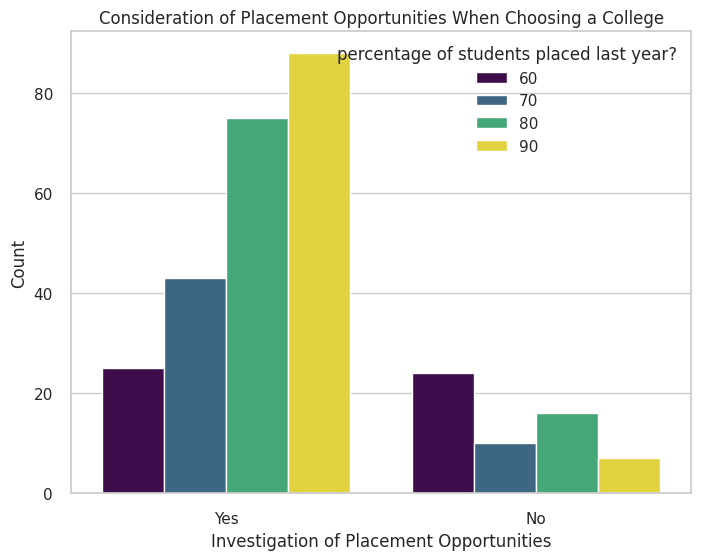

In [29]:
#1. Bar Chart - Consideration of Placement Opportunities:

# Bar chart for consideration of placement opportunities
plt.figure(figsize=(8, 6))
sns.countplot(x='Have you investigated this detail while choosing your college?',
              data=data, hue='percentage of students placed last year?', palette='viridis')
plt.title('Consideration of Placement Opportunities When Choosing a College')
plt.xlabel('Investigation of Placement Opportunities')
plt.ylabel('Count')
plt.show()




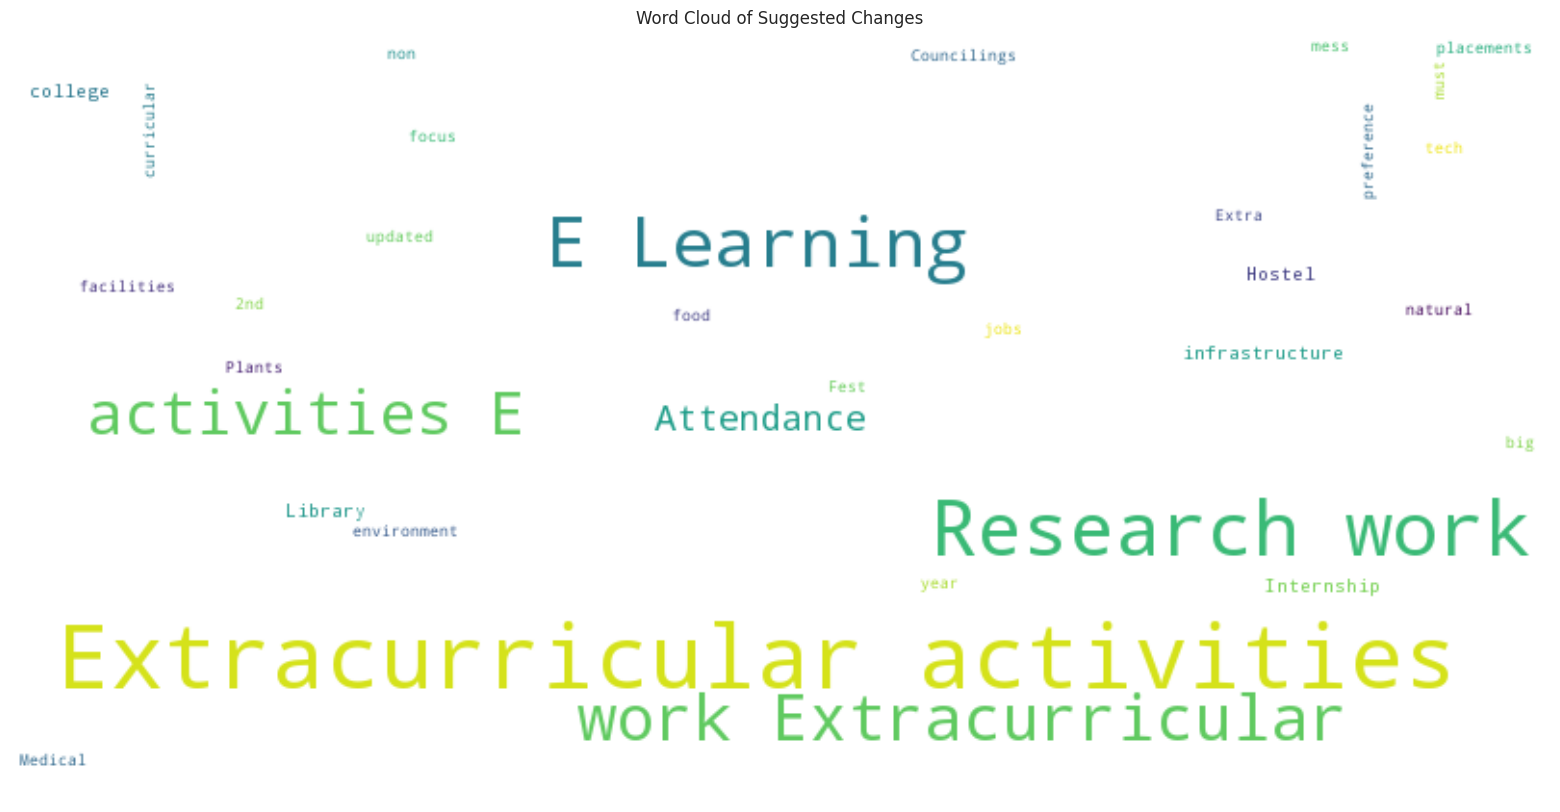

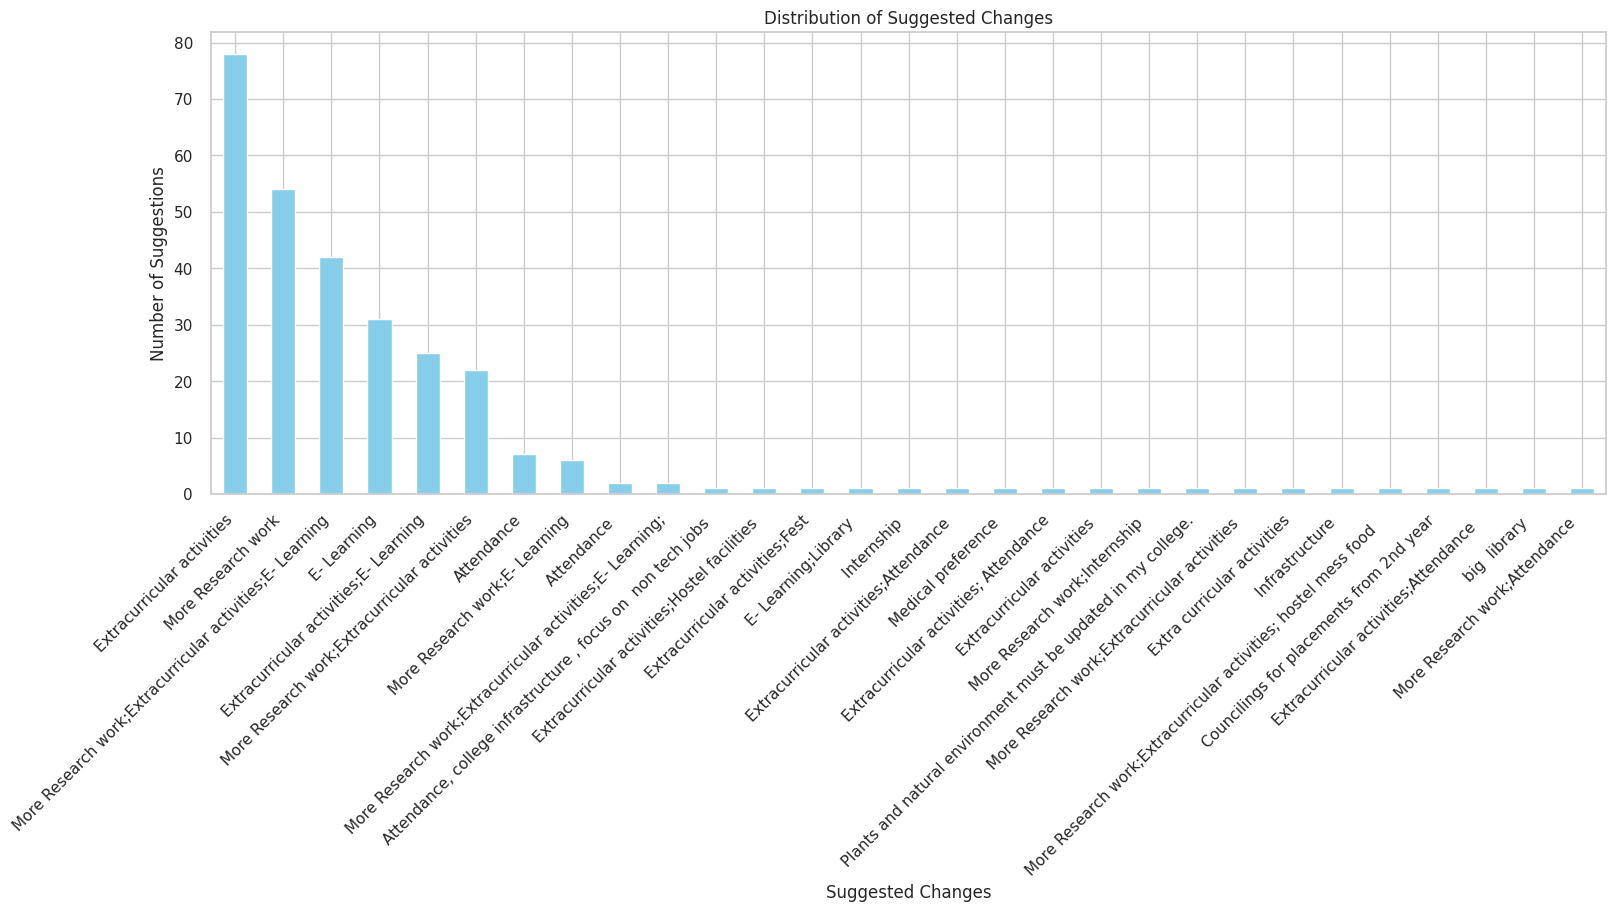

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming your dataset is stored in a CSV file named 'college_feedback.csv'
data = pd.read_csv('college.csv')

# Assuming you have a column named 'Suggested Changes'
suggestions = data['Any suggested changes in your college?'].dropna()

# Visualize Word Cloud for Common Themes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(suggestions))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suggested Changes')
plt.show()

# Visualize Bar Chart for Distribution of Suggestions
plt.figure(figsize=(18, 6))
suggestions_count = data['Any suggested changes in your college?'].value_counts().sort_values(ascending=False)
suggestions_count.plot(kind='bar', color='skyblue')
plt.xlabel('Suggested Changes')
plt.ylabel('Number of Suggestions')
plt.title('Distribution of Suggested Changes')
plt.xticks(rotation=45, ha='right')
plt.show()


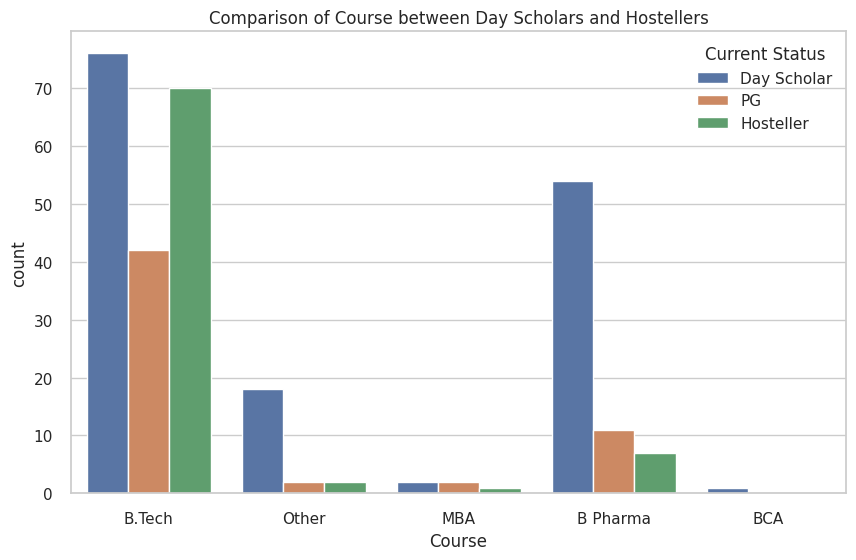

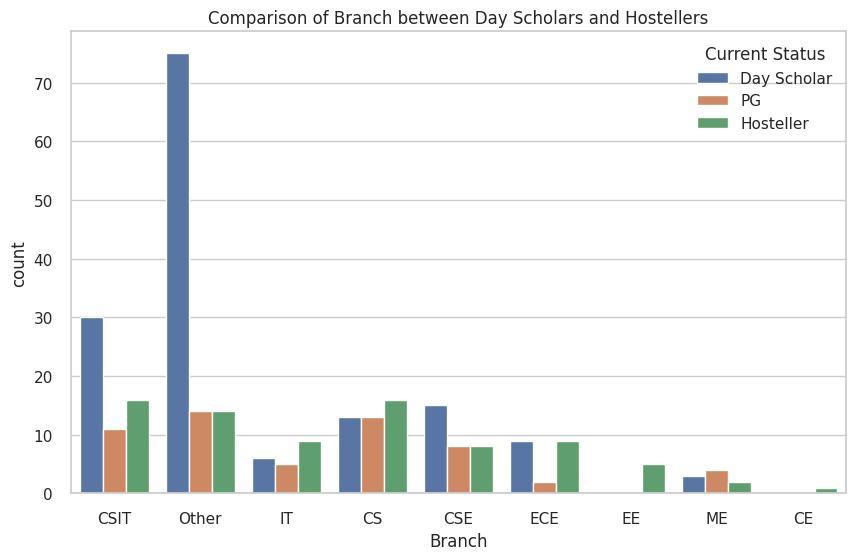

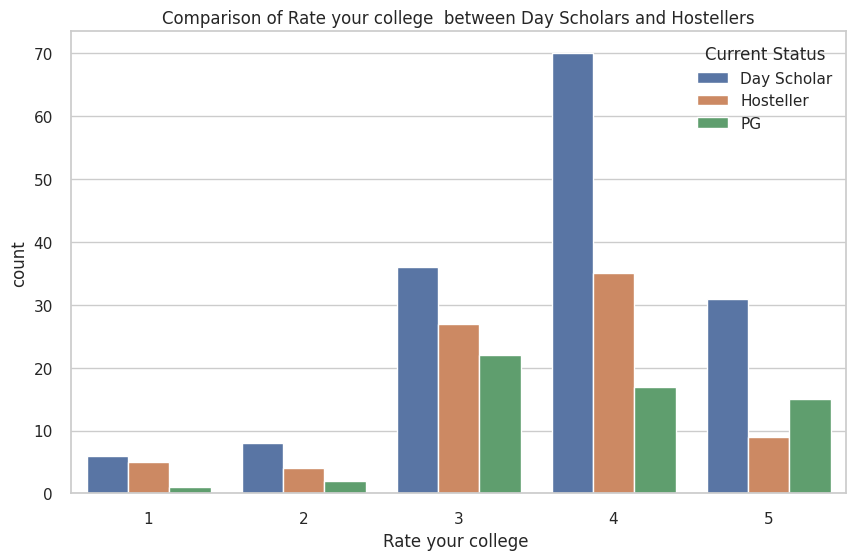

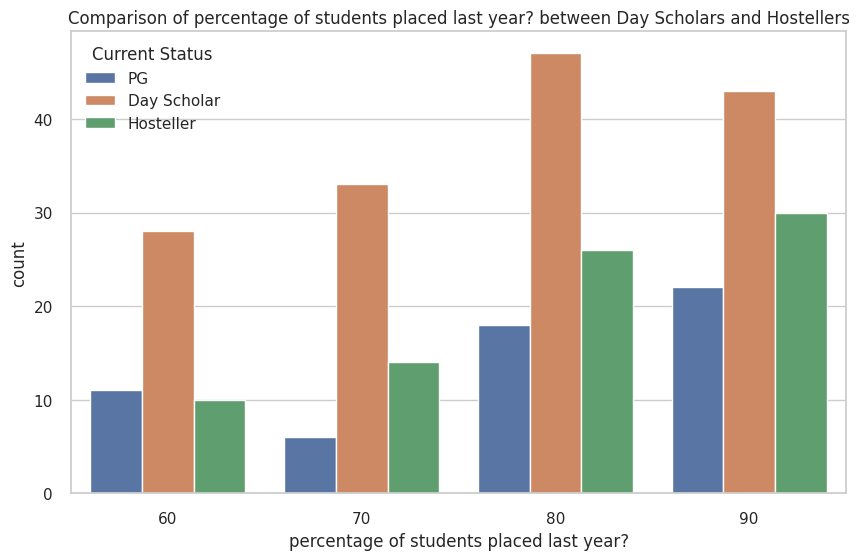

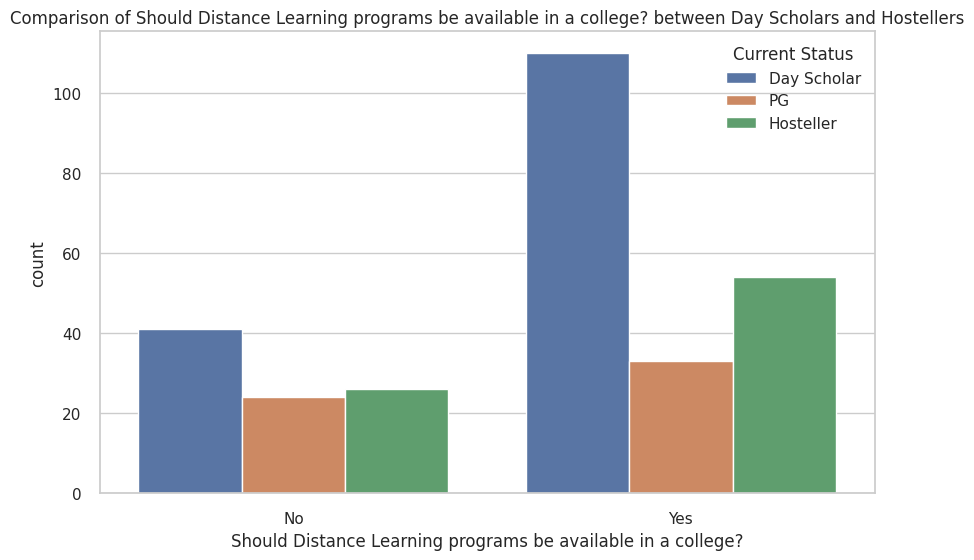

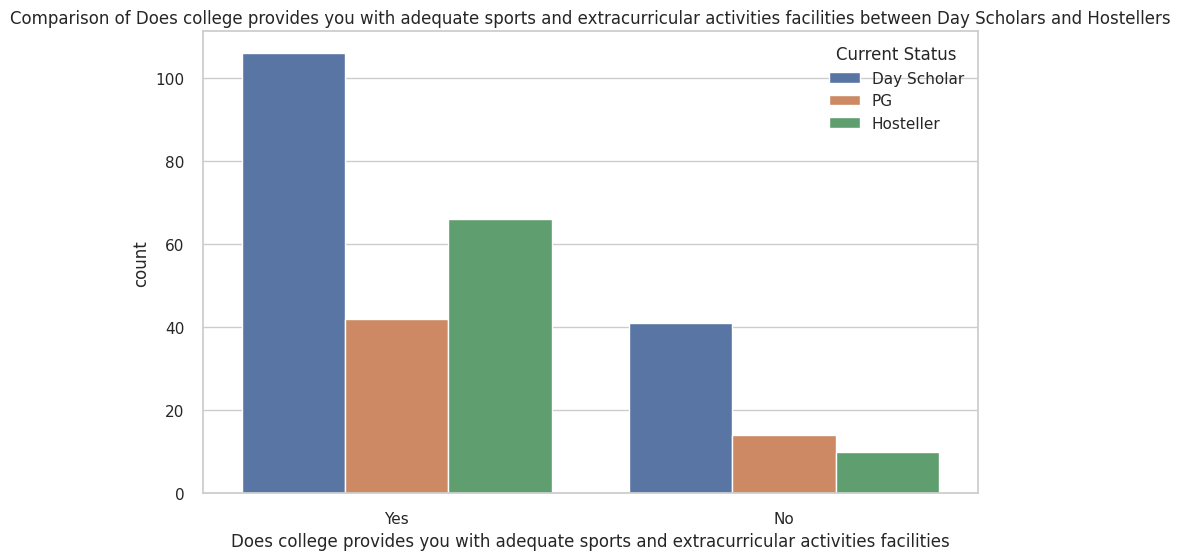

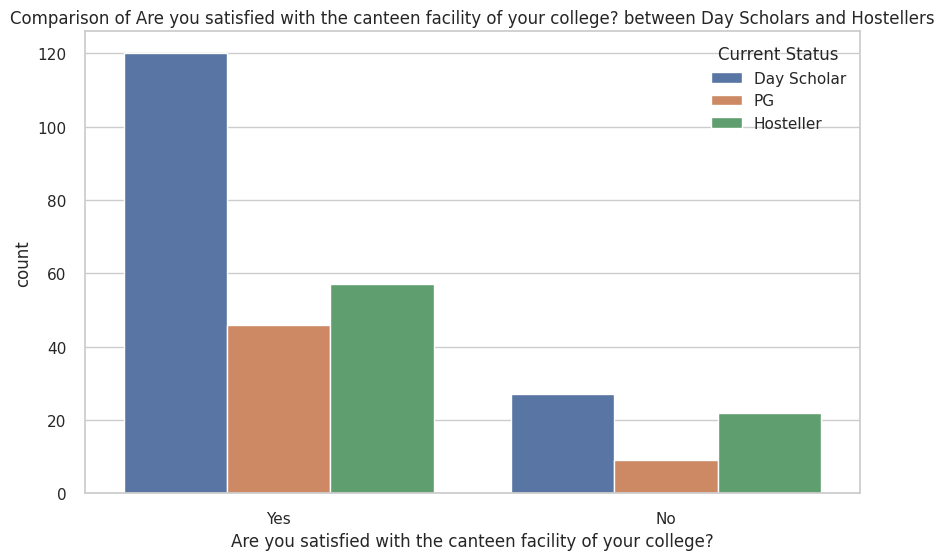

In [38]:
#Compare the preferences and satisfaction levels of day scholars and hostellers.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'college_dataset.csv'
data = pd.read_csv('college.csv')

# Selecting relevant columns for analysis
selected_columns = [
    'Course', 'Branch', 'Your Family income', 'Average package you prefer for your college?',
    'Does Travel Time plays key role in your choice making?', 'Social-class status of college that you would prefer?',
    'faculty score you prefer ?', 'Rate your college ', 'percentage of students placed last year?',
    'Have you considered good Alumni network of any college while taking admission in it?',
    'Do you prefer colleges that provide financial-aid for students?',
    'Have you considered the policies of any college while choosing it ?',
    'What did you preferred?', 'What do you prefer about the policies of any college?',
    'Should Distance Learning programs be available in a college?',
    'prefer the most for extra - curricular activities related to your future support?',
    'Does college provides you with adequate sports and extracurricular activities facilities',
    'What did you prefer in college Infrastructure?', 'Which Language you prefer?',
    'Which region do you belong to?', 'Your current status among the following?',
    'Does your college make improvements as per the trends?', 'Does your college library provide adequate resources?',
    'Are you satisfied with the canteen facility of your college?', 'Any suggested changes in your college?'
]

# Creating a subset of the dataset with selected columns
subset_data = data[['Your current status among the following?', 'Course', 'Branch', 'Rate your college ',
                    'percentage of students placed last year?', 'Should Distance Learning programs be available in a college?',
                    'Does college provides you with adequate sports and extracurricular activities facilities',
                    'What did you prefer in college Infrastructure?', 'Are you satisfied with the canteen facility of your college?']]

# Renaming the column for better readability
subset_data = subset_data.rename(columns={'Your current status among the following?': 'Current Status'})

# Filtering data for day scholars and hostellers
day_scholars_data = subset_data[subset_data['Current Status'] == 'Day Scholar']
hostellers_data = subset_data[subset_data['Current Status'] == 'Hosteller']

# Set up a function for plotting to avoid repetitive code
def plot_comparison(column_name, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, hue='Current Status', data=subset_data)
    plt.title(title)
    plt.show()

# Plotting for selected columns
columns_to_plot = ['Course', 'Branch', 'Rate your college ', 'percentage of students placed last year?',
                   'Should Distance Learning programs be available in a college?',
                   'Does college provides you with adequate sports and extracurricular activities facilities',
                   'Are you satisfied with the canteen facility of your college?']

for column in columns_to_plot:
    plot_comparison(column, f'Comparison of {column} between Day Scholars and Hostellers')


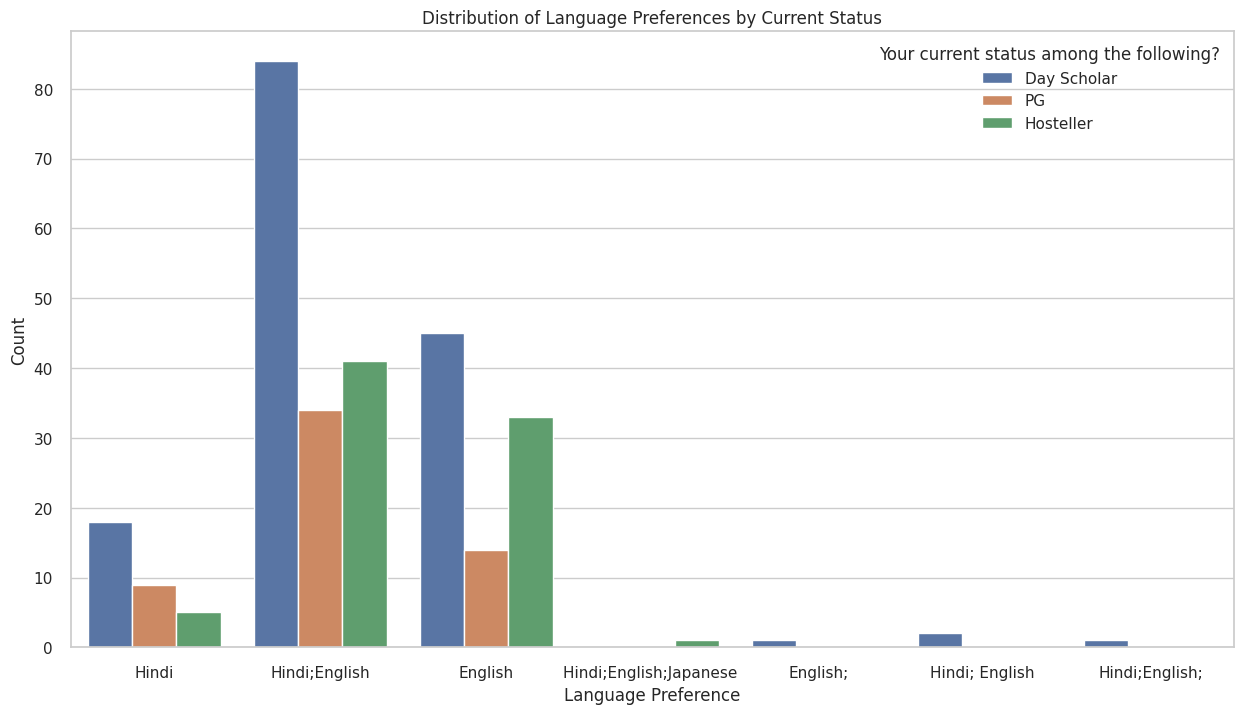

In [32]:
#To examine how language preferences influence college choices and show relationships between given factors through a graph.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'college_choices.csv'
data = pd.read_csv('college.csv')

# Create a count plot to show the distribution of language preferences
plt.figure(figsize=(15, 8))
sns.countplot(x='Which Language you prefer?', data=data, hue='Your current status among the following?')
plt.title('Distribution of Language Preferences by Current Status')
plt.xlabel('Language Preference')
plt.ylabel('Count')
plt.show()


In [33]:
#Based on the given dataset and the objectives we discussed earlier, you can identify different types of students in a college. Here are some potential segments or categories based on the analysis of factors such as preferences, demographics, and decision-making criteria:

#he Practical Planners:

Characteristics:
Consider financial aspects (family income, preferred average package).
Pragmatic decision-makers who investigate details.
Prefer medium to high faculty scores and academic considerations.

#The Social Influencers:

Characteristics:
Influenced by friends and family in their decision-making.
Consider social media and networking for college information.
May prioritize extracurricular activities and a good alumni network.

#The Budget-Conscious Seekers:

Characteristics:
Emphasize financial aid and family income in their choices.
Seek colleges with policies supporting financial assistance.
May prefer colleges with a low cost of living.

#The Academic Enthusiasts:

Characteristics:
Prioritize academic factors such as faculty scores, college rating.
Likely to investigate internship and placement opportunities.
May consider colleges that adapt to trends and improvements.

#The Sports and Extracurricular Enthusiasts:

Characteristics:
Emphasize sports facilities, extracurricular activities, and clubs.
Consider distance learning programs and e-learning options.
May prefer colleges with a strong emphasis on holistic development.

#The Regional Trend Followers:

Characteristics:
Choices influenced by the region they belong to.
May consider colleges that align with regional preferences.
Regional identity and preferences play a key role in decision-making.

#The Language-Priority Seekers:

Characteristics:
Prioritize language preferences in their college choices.
May have a strong preference for colleges that offer instruction in a specific language.
Consider language-related factors in various aspects of college life.

#The Internship and Placement Focused:

Characteristics:
Investigate internship and placement details.
May prioritize colleges with a high percentage of students placed.
Seek colleges with strong industry/Alumni connections.

#The Trend Followers:

Characteristics:
Prefer colleges that adapt to trends and improvements.
Open to changes and innovations in the academic environment.
May prioritize colleges with a reputation for staying current.

#The Facility Satisfaction Seekers:

Characteristics:
Place importance on various facilities (library, canteen, cleanliness).
Satisfaction with college infrastructure and amenities is a key factor.
May prefer colleges with a well-maintained and equipped campus.

<class 'SyntaxError'>: invalid syntax (<ipython-input-33-4ad87cbba804>, line 5)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 84, ncost: 179.97241672986183
Run: 1, iteration: 2/100, moves: 33, ncost: 172.60740637818154
Run: 1, iteration: 3/100, moves: 1, ncost: 172.5842751949884
Run: 1, iteration: 4/100, moves: 0, ncost: 172.5842751949884


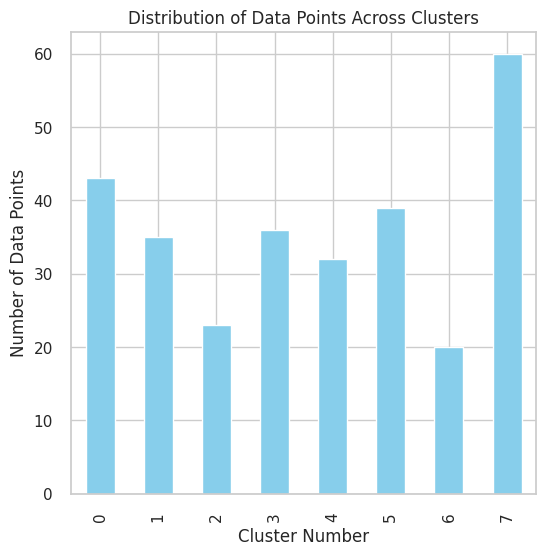

    Your current status among the following? Which Language you prefer?  \
0                                Day Scholar                      Hindi   
1                                         PG              Hindi;English   
2                                         PG                    English   
3                                Day Scholar              Hindi;English   
4                                Day Scholar              Hindi;English   
..                                       ...                        ...   
283                              Day Scholar                      Hindi   
284                              Day Scholar                    English   
285                              Day Scholar              Hindi;English   
286                              Day Scholar                    English   
287                                       PG              Hindi;English   

     Cluster                            Cluster Name  
0          0                      Practical 

In [36]:
import piplite
await piplite.install('kmodes')

import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'college_choices.csv'
data = pd.read_csv('college.csv')

# Select relevant columns for clustering (assuming you have already identified numerical and categorical columns)
numerical_columns = ['Your Family income', 'Average package you prefer for your college?']
categorical_columns = ['Which Language you prefer?', 'Your current status among the following?']

# One-hot encode categorical variables
encoded_data = pd.get_dummies(scaled_dataset[categorical_columns], drop_first=True)

# Combine numerical and encoded categorical data
cluster_data = pd.concat([scaled_dataset[numerical_columns], encoded_data], axis=1)

# Standardize numerical data
scaler = StandardScaler()
cluster_data[numerical_columns] = scaler.fit_transform(cluster_data[numerical_columns])

# Apply K-Prototypes algorithm
kproto = KPrototypes(n_clusters=8, init='Cao', n_init=1, verbose=2)
clusters = kproto.fit_predict(cluster_data.values, categorical=[2, 3])

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Plot the bar graph of cluster distribution
plt.figure(figsize=(6, 6))
data['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Data Points')
plt.show()

# Map cluster numbers to meaningful names
cluster_names = {
    0: 'Practical Planners',
    1: 'Social Influencers',
    2: 'Budget-Conscious Seekers',
    3: 'Academic Enthusiasts',
    4: 'Sports and Extracurricular Enthusiasts',
    5: 'Regional Trend Followers',
    6: 'Language-Priority Seekers',
    7: 'Internship and Placement Focused'
}

# Add cluster labels to the original dataset
data['Cluster'] = clusters
data['Cluster Name'] = data['Cluster'].map(cluster_names)

# View the resulting clusters
print(data[['Your current status among the following?', 'Which Language you prefer?', 'Cluster', 'Cluster Name']])

